# This is both in class-practice Lecture 12 and HW#4 which is due at 6:30PM on March 16th 2016!

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline

/Users/albarron/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
url = "../Data/spambase.csv"
SpamData = pd.read_csv(url)
SpamData.head()
len(SpamData)

4601

In [4]:
ListOfAllVariables = SpamData.columns.values
X = SpamData[ListOfAllVariables]
del X['is_spam']
y = SpamData['is_spam']

In [5]:
X.head(2)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0,0.32,0.00,0.00,0.00,0,0.00,...,0,0,0.000,0,0.778,0.00,0.000,3.756,61,278
1,0.21,0.28,0.50,0,0.14,0.28,0.21,0.07,0,0.94,...,0,0,0.132,0,0.372,0.18,0.048,5.114,101,1028


### Earlier in this course, we used logistic regression model and could achieve 8.2% misclassification error. Now, you know a little bit of higher end algorithms like Random Forest and boosting. Go ahead and beat Logistic regression algorithm. The champion, the person who beats CV-error of 8.2% and makes the least amount of error will receive a ONE DOLLAR bill award! 
### Just beat it, beat it, beat it, beat it
### No one wants to be defeated
### Showin' how funky strong is your fight 
### It doesn't matter who's wrong or right 

In order to be consitent use the following way to cross-validate your errors:
from sklearn import cross_validation

kf = cross_validation.KFold(len(BostonData), n_folds = 10, shuffle = True) 

scores = []

for train_index, test_index in kf:

                                  ...
                                  

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import cross_val_score


In [23]:
# Fit the Features!
score = []
Features = range(1,len(X.columns))
for i in Features:
    RF = RandomForestRegressor(n_estimators = 100,
                               max_features = i, #len(X.columns)/3, # Was 10
                               min_samples_leaf = 5,
                               oob_score = True)
    scores = cross_val_score(RF, X, y, cv=10, scoring='mean_squared_error')
    score.append(np.mean(np.sqrt(-scores)))

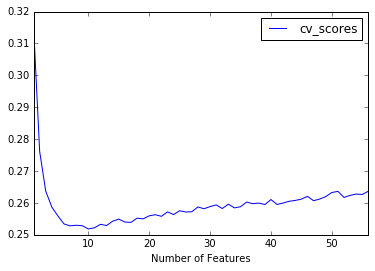

In [28]:
Depth_Choice_df = pd.DataFrame({'cv_scores': score,'Number of Features': Features})
Depth_Choice_df.plot(x ='Number of Features',y = 'cv_scores')

In [7]:
# Tune the Trees!
score = []
trees = [100,500,1000,2000,4000,8000,10000] # 8000 was the outcome
for i in trees:
    RF = RandomForestRegressor(n_estimators = i,
                               max_features = 10, # from prev
                               min_samples_leaf = 5,
                               oob_score = True)
    scores = cross_val_score(RF, X, y, cv=10, scoring='mean_squared_error')
    score.append(np.mean(np.sqrt(-scores)))
# RF.fit(X,y)

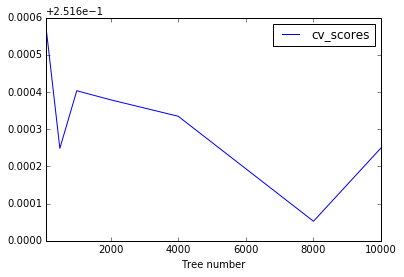

In [9]:
Depth_Choice_df = pd.DataFrame({'cv_scores': score ,'Tree number': trees})
Depth_Choice_df.plot(x ='Tree number',y ='cv_scores')

In [10]:
# Prune the branches!
score = []
leaf = range(1,6)
for i in leaf:
    RF = RandomForestRegressor(n_estimators = 8000,
                               max_features = 10, # from prev
                               min_samples_leaf = i,
                               oob_score = True)
    scores = cross_val_score(RF, X, y, cv=10, scoring='mean_squared_error')
    score.append(np.mean(np.sqrt(-scores)))
# RF.fit(X,y)

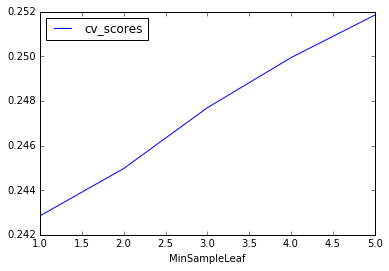

In [11]:
Depth_Choice_df = pd.DataFrame({'cv_scores': score ,'MinSampleLeaf': leaf})
Depth_Choice_df.plot(x ='MinSampleLeaf',y ='cv_scores')

WHAT BE YONDER ERROR, FRIEND?!

In [14]:
from sklearn import cross_validation
kf = cross_validation.KFold(len(SpamData), n_folds = 10, shuffle = True)
scores = []

RF = RandomForestRegressor(n_estimators = 8000,
                       max_features = 10, # from prev
                       min_samples_leaf = 1,
                       oob_score = True)

for train_index, test_index in kf:
        RF.fit(X.iloc[train_index], y.iloc[train_index])
        y_hat_test = e.predict(X.iloc[test_index]) 
        scores.append(float(sum(y_hat_test == y.iloc[test_index]))/len(y_hat_test))

Tree_CV = np.mean(scores)    

print(Tree_CV) 

0.0667249834952


Wait, what?

In [15]:
print 1-Tree_CV

0.933275016505


In [20]:
RF.oob_score_

0.84295427909786169

In [19]:
sorted(zip(RF.feature_importances_,X.columns.values),reverse=True)

[(0.14229912915266038, 'char_freq_!'),
 (0.10620847638751978, 'char_freq_$'),
 (0.089438534762963554, 'word_freq_remove'),
 (0.074145608155481102, 'word_freq_free'),
 (0.063820267559396224, 'capital_run_length_average'),
 (0.059281497359193198, 'word_freq_your'),
 (0.051677993510880316, 'capital_run_length_longest'),
 (0.044465469809318356, 'word_freq_hp'),
 (0.040144033643405817, 'capital_run_length_total'),
 (0.037370775981599831, 'word_freq_money'),
 (0.027605870015648157, 'word_freq_our'),
 (0.02491284639591507, 'word_freq_you'),
 (0.019149685100683555, 'word_freq_000'),
 (0.018003466932802581, 'word_freq_edu'),
 (0.0168953676595862, 'word_freq_george'),
 (0.015363229731465375, 'word_freq_hpl'),
 (0.012088390864255978, 'word_freq_1999'),
 (0.011265355207765405, 'char_freq_('),
 (0.010991863473135638, 'word_freq_internet'),
 (0.010579261470284929, 'word_freq_business'),
 (0.010406331300662531, 'word_freq_will'),
 (0.0092872198716584496, 'word_freq_re'),
 (0.0088405239655549583, 'wor

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [28]:
boost = GradientBoostingRegressor(learning_rate = 0.01,
                                     n_estimators = 8000,
                                     max_depth = 2,
                                     min_samples_leaf = 5  )
scores = cross_val_score(boost, X, y, cv=10, scoring='mean_squared_error')
print (np.mean(np.sqrt(-scores)))

0.25399190307


In [29]:
depth = range(1,5)
score = []
for i in depth:
                boost = GradientBoostingRegressor(learning_rate = 0.01,
                                             n_estimators = 10000,
                                             max_depth = i,
                                             min_samples_leaf = 5  )  
                scores = cross_val_score(boost, X, y, cv=10, scoring='mean_squared_error')
                score.append(np.mean(np.sqrt(-scores)))

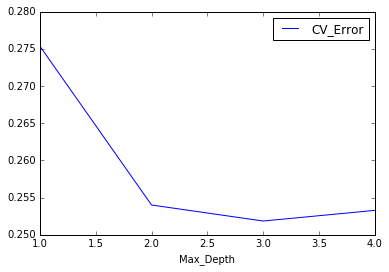

In [30]:
Depth_Choice_df = pd.DataFrame({'CV_Error': score ,'Max_Depth': depth})
Depth_Choice_df.plot(x ='Max_Depth',y = 'CV_Error' )

In [ ]:
lambd = [0.001,0.01,0.05,0.08,0.1]
score = []
for i in lambd:
    boost = GradientBoostingRegressor(learning_rate = i,
                                 n_estimators = 10000,
                                 max_depth = 3,
                                 min_samples_leaf = 5 )
    scores = cross_val_score(boost, X, y, cv=10, scoring='mean_squared_error')
    score.append(np.mean(np.sqrt(-scores)))

In [ ]:
Wait, what